In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pytest
import random
from sklearn import preprocessing, datasets, model_selection, linear_model, decomposition
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from keras.utils import np_utils
from tensorflow.keras import backend as K

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

## A toy example of exception handling and logging.

In [2]:
import logging

logging.basicConfig(level = logging.ERROR)

x = [
    1, 2, 3, 4, 5, 6
    ]
                                                                #Dividing x by y where list y has a zero value
y = [
    2, 2, 2, 0, 2, 2
    ]

sum_ratio = 0 

for i in range (0, len(x)):
    
    try:
        ratio = x[i] / y[i]
        sum_ratio += ratio 
        
    except ZeroDivisionError:
        logging.error("Divison by zero is not acceptable")      #Displaying an error log
     
    except:
        print("Value", x[i], "and", y[i], "are excluded from the input")

ERROR:root:Divison by zero is not acceptable


## Importing a dataset downloaded from UCI. This dataset has attributes that describe the popularity of blogs posted on Mashable. The number of views is our target variable which will later convert into categorical.

In [3]:
data_raw = pd.read_csv('OnlineNewsPopularity.csv')      #Importing data

## Understanding and Cleaning the data

In [4]:
def preliminary(data):

    display(data.head(5))                               #Analyzing the first five rows of the dataset
    print("The number of rows is", data.shape[0])       #Printing the number of rows
    print("The number of columns is", data.shape[1])    #Printing the number of columns

preliminary(data_raw)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


The number of rows is 39644
The number of columns is 61


In [5]:
def clean_columns(data):                  #ensuring that each column name has no extra space
    new_names = []
    
    for name in data.columns:
        name = name.strip()
        new_names.append(name)
        
    data.columns = new_names
    
    return data

data_clean = clean_columns(data_raw)

In [6]:
def delete_columns(data, cols_list):                      #delete columns that are not required
    
    for col in cols_list:
        del data[col]            
        
delete_columns(data_clean, ['url', 'timedelta'])         #delete url of blog and time the blog was published

## Exploratory Data Analysis

In [7]:
data_clean.describe()                             #Understanding the distributions of the variables

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

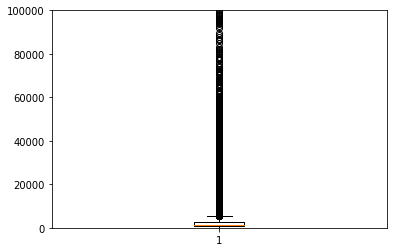

In [8]:
target = data_clean['shares']                     #Analyzing the distribution of the target variable
display(target.describe())

plt.boxplot(target)
plt.ylim([-10, 100000])                           #The boxplot shows its ridden with outliers
plt.show()

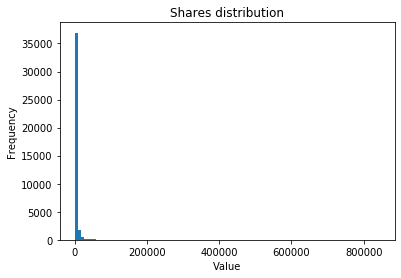

In [9]:
plt.hist(target, bins= 100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Shares distribution')
plt.show()

In [10]:
data_clean = data_clean[(data_clean['shares'] >= 100)                        #subsetting based on outliers
                        & (data_clean['shares'] <= 10000)]

In [11]:
data_clean['shares_cat'] = pd.cut(data_clean['shares'],                      #converting shares into a ordinal variable
                                  [0, 1500, 50000])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
def normalize(df):                                                           # Normalization Function
    scaler = preprocessing.StandardScaler()                                  # Loading the Scaler
    copy = df.copy()
    
    for feature_name in df.columns:
        
        if  (copy[feature_name].dtype == 'float64'                           # Checking for a float attribute
            or 
            copy[feature_name].dtype == 'int'):                              # Checking for an int attribute
                
            fit = scaler.fit(np.array(df[feature_name]).reshape(-1, 1))      # Normalizing 
            copy[feature_name] = scaler.transform(df[[feature_name]])
    
        else:
            
            copy[feature_name] = df[feature_name]
            
    return copy

normalized_df = normalize(data_clean)
print(normalized_df.head(1))

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0        0.759146         -0.703559         0.031538          0.000159   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.037016  -0.606995        -0.33854 -0.419008   -0.302237   

   average_token_length  ...  max_positive_polarity  avg_negative_polarity  \
0              0.152414  ...              -0.226636              -0.723103   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0               -0.27513              -0.981712            0.684291   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.982249               -1.808786   

   abs_title_sentiment_polarity    shares  shares_cat  
0                      0.150675 -0.813133   (0, 1500]  

[1 rows x 60 columns]


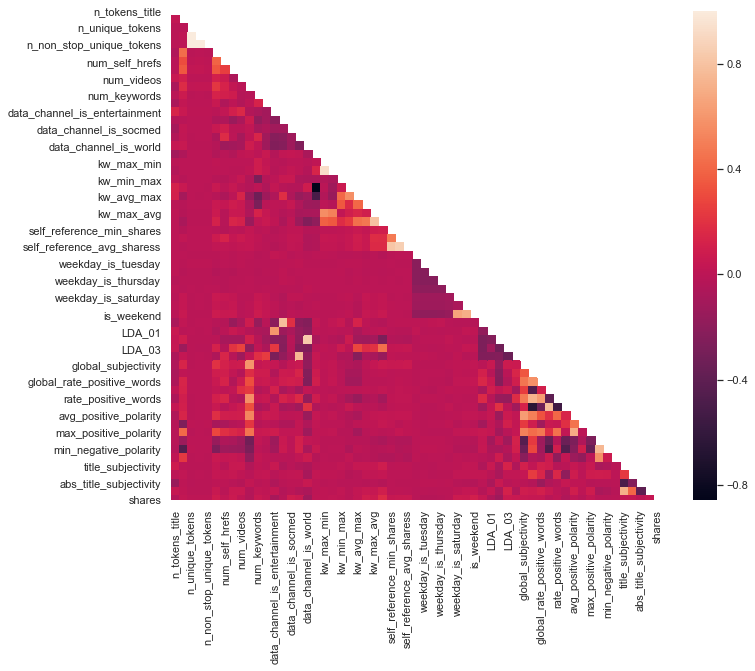

In [13]:
                                                            #Building a correlation matrix and a corellogram

sns.set(style="white")

corr = normalized_df.corr()                                 # Compute the correlation matrix

mask = np.zeros_like(corr, dtype = np.bool)                 # Generate a mask for the upper triangle
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask = mask)                              # Draw the heatmap with the mask
plt.show()

In [14]:
x = data_clean.iloc[:, :-2]                                               #getting all features

le = preprocessing.LabelEncoder()                                        #transforming cut shares into category
normalized_df['y_true'] = le.fit_transform(normalized_df['shares_cat'])
y = normalized_df['y_true']

# MODELING

In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y,  #splitting dataset into train and test
                                                    test_size=0.20,
                                                    random_state=42)

###### Fitting a Logistic Regression Model

In [16]:
lm = linear_model.LogisticRegression()                                     # Loading the model
model = lm.fit(X_train, y_train)                                            # Fitting the model
accu = model.score(X_test, y_test)                                          # Getting the score
print("Accuracy of testing set is", accu*100, "%")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of testing set is 60.49498327759197 %


###### Training Neural Network

In [20]:
model = Sequential()                                              #Intializing a sequential model
model.add(Dense(50, input_dim = 58, activation = "relu"))         # Hidden Layer
model.add(Dense(100, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(2, activation = "sigmoid"))                       # Output Layer

model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

for i in range(1,10):                                             #Iterating through epochs 
    history = model.fit(X_train, y_train, 
                        epochs = i, verbose=0)
    score, acc = model.evaluate(X_test, y_test)                   #Stopping when accuracy is 100%
    if acc == 1.0:
        cost = score
        break

7475/7475 [==============================] - 0s 25us/sample - loss: 0.6931 - acc: 0.5695


Text(0.5, 1.0, 'Cost vs Epochs')

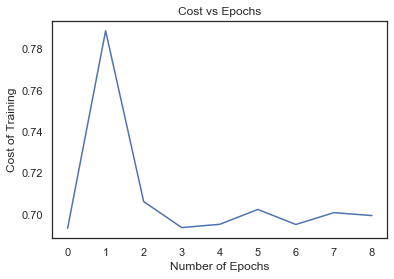

In [21]:
plt.plot(history.history['loss'], label = "loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Cost of Training")
plt.title("Cost vs Epochs")